In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install libraries
!pip install pandas numpy matplotlib seaborn nltk tensorflow keras

In [ ]:
#importing Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
# Build the model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Concatenate




In [ ]:
# Load news data (headlines + labels)
news = pd.read_csv('/content/drive/MyDrive/Combined_News_DJIA(train).csv', parse_dates=['Date'])

# Load stock data (prices)
djia = pd.read_csv('/content/drive/MyDrive/DJIA_table(train).csv', parse_dates=['Date'])

<ipython-input-4-55bcc03c624a>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  djia = pd.read_csv('/content/drive/MyDrive/DJIA_table(train).csv', parse_dates=['Date'])


In [ ]:
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-31,17590.66016,17590.66016,17421.16016,17425.02930,93690000,17425.02930
1,2015-12-30,17711.93945,17714.13086,17588.86914,17603.86914,59760000,17603.86914
2,2015-12-29,17547.36914,17750.01953,17547.36914,17720.98047,69860000,17720.98047
3,2015-12-28,17535.66016,17536.90039,17437.33984,17528.26953,59770000,17528.26953
4,2015-12-24,17593.25977,17606.33984,17543.94922,17552.16992,40350000,17552.16992


In [ ]:
# Get unique dates in both datasets
news_dates = news['Date'].unique()
djia_dates = djia['Date'].unique()

# Check the first and last dates in both datasets
first_news_date = news_dates.min()
last_news_date = news_dates.max()

first_djia_date = djia_dates.min()
last_djia_date = djia_dates.max()

# Print the first and last dates to compare
print(f"News dataset starts on: {first_news_date}, ends on: {last_news_date}")
print(f"Djia dataset starts on: {first_djia_date}, ends on: {last_djia_date}")

News dataset starts on: 2008-08-08 00:00:00, ends on: 2016-07-01 00:00:00
Djia dataset starts on: 2008-08-08 00:00:00, ends on: 2015-12-31 00:00:00


In [ ]:
# Trim the news dataset to end at 2015-12-31
news = news[news['Date'] <= '2015-12-31']

# Check the new date range for the trimmed news dataset
print(f"Trimmed news dataset starts on: {news['Date'].min()}, ends on: {news['Date'].max()}")


Trimmed news dataset starts on: 2008-08-08 00:00:00, ends on: 2015-12-31 00:00:00


News data extends into 2016, while DJIA (stock data) ends in 2015. Trim news data to match DJIA’s end date (2015-12-31) to avoid mismatches when merging.

In [ ]:
# Merge the data on 'Date' column
train = pd.merge(news, djia, on='Date', how='inner')
train.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969


# Data Preprocessing
Tn this section we understanding the Dataset, perform Data Cleaning imputing missing values and detect and handle Outliers.

In [ ]:
train.dtypes

,0
Date,datetime64[ns]
Label,int64
Top1,object
Top2,object
Top3,object
Top4,object
Top5,object
Top6,object
Top7,object
Top8,object


In [ ]:
merge_dates = train['Date'].unique()

# Check the first and last dates in both datasets
first_merge_date = merge_dates.min()
last_merge_date = merge_dates.max()
print(f" dataset starts on: {first_merge_date}, ends on: {last_merge_date}")

 dataset starts on: 2008-08-08 00:00:00, ends on: 2015-12-31 00:00:00


In [ ]:
# Check for missing values
print("\nMissing Values in Merged Data:\n", train.isnull().sum())


Missing Values in Merged Data:
 Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        1
Top24        3
Top25        3
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [ ]:
# Impute missing values with the most frequent headline in each column
for col in ['Top23', 'Top24', 'Top25']:
    most_frequent_value = train[col].mode()[0]
    train[col].fillna(most_frequent_value, inplace=True)

# Check the result after filling missing values
print(f"Missing values after imputation:\n{train.isnull().sum()}")

Missing values after imputation:
Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        0
Top24        0
Top25        0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


<ipython-input-13-75368393cdf0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(most_frequent_value, inplace=True)


In [ ]:
print(train.duplicated().sum())


0


In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for the numeric columns
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
z_scores = train[numeric_columns].apply(zscore)

# Set a threshold for Z-score (commonly 3 or -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Show rows with outliers based on Z-score
outliers_zscore_rows = train[outliers_zscore.any(axis=1)]
outliers_zscore_rows.head(5)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
26,2008-09-16,1,"b""Pakistani Tribesmen Representing Half A Mill...",b'Italy: Berlusconi government seeks to rehabi...,b'A chemical blamed for killing two infants in...,b'Pakistan Orders Troops to Open Fire on U.S. ...,"b'Aquaflow Strikes Oil with ""Green Crude"" from...",b'Afghan civilian casualties soar. The UN says...,b'Pakistan orders troops to open fire if US la...,b'Suicide bombing kills 22 in Iraq',...,b'Thousands flee heavy Darfur fighting',b'Many more U.S. troops needed in Afghan war: ...,b'A fatwa against Mickey Mouse',b'Mideast leaders to meet amid doubts of a deal',10905.620120,11093.219730,10742.700200,11059.019530,494760000,11059.019530
27,2008-09-17,0,b'Attack on US embassy in Yemen leaves 16 dead',b'100 groups demand to see secret anticounterf...,b' Suspected U.S. missiles hit Pakistani village',b'Zimbabwe: Loaf of bread now costs $10 trillion',"b'Russian stock exchanges halt trades, drop 60...","b""Government drug advisers begin review of ecs...","b'Blasts, gunfire near U.S. Embassy in Yemen'",b'Yesterday: US Military leaders tell Pakista...,...,b'Tony Blair to appear on The Daily Show with ...,"b'At least 100 rapes in Karachi,Pakistan a day'",b'US footage of attack that killed Pakistani s...,"b""Potential HBOS- Lloyds merger 'bad news for ...",11056.580080,11057.309570,10595.900390,10609.660160,463200000,10609.660160
28,2008-09-18,1,"b'6,200 babies sick: Milk scandal spreading '",b'Afghan farmers are pulling up poppies for wh...,b'Venezuela Says U.S. Uses Anti-Drug List as W...,b'6 more people die in another US missile stri...,b'U.S. may use Georgian air bases to strike at...,b'Russia may sell more air defense systems to ...,b'Russian President Threatens Arctic Annexation',b'China accuses US of financial Weapon of Mass...,...,"b""Sri Lanka's navy says it has fought a sea ba...",b'official poverty rates of 51.8% in Gaza and ...,b'India deploys planes with Nuclear Capability...,b'Tariq Ali: Has the U.S. Invasion of Pakistan...,10609.009770,11076.440430,10459.440430,11019.690430,488060000,11019.690430
29,2008-09-19,1,b'Brits take a stand - ban short-selling of fi...,b'Scientology could be banned in France if the...,"b""Spain's media in uproar over McCain's commen...","b""Arabs across the ideological spectrum are de...",b' Bitter Asians wag the finger at U.S. bank b...,"b""Rome's Ban On Skimpy Clothing Leads Prostitu...","b""UCLA study of satellite imagery casts doubt ...",b'China Blames Wall Street Meltdown On Federal...,...,b'Chavez expells Human Rights Watch from Venez...,b'Euthanasia advocate takes her own life.',"b""The complete list of the world's billionaires""","b""Swaziland's HIV/AIDS treatment crisis goes c...",11027.509770,11483.049810,11026.700200,11388.440430,655110000,11388.440430
42,2008-10-08,0,b'Modern slavery in Dubai',"b'Brazil and Argentina, two biggest economies ...","b""The British government's plan for teachers t...",b'Attack on U.S. Embassy in Yemen Linked to Is...,b'Russian President Dmitry Medvedev has starte...,"b""China's super-wealthy lose a third of their ...",b'Chinese Space Walk Filmed in Water',b'UK announces 50bn ($88bn) rescue plan',...,b'China reluctant to reveal tainted milk figures',b'Is CNN Biased In This Presidential Race? I h...,"b""Anger over Baader-Meinhof Biopic: Victims' F...",b'A bunch of multinationals have figured out h...,9437.230469,9628.070312,9194.780273,9258.099609,479270000,9258.099609


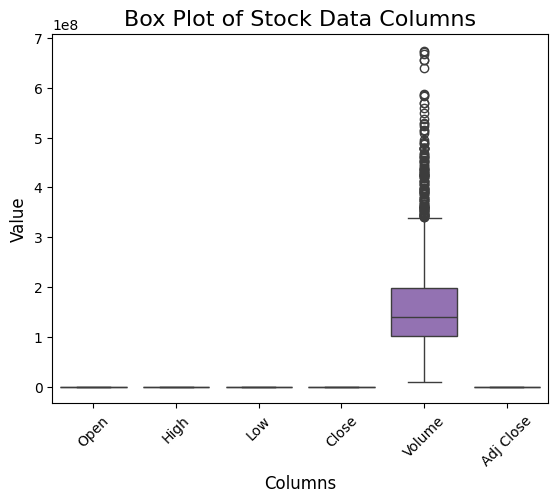

In [ ]:
# Create a box plot for each numeric column
sns.boxplot(data=train[numeric_columns])

# Set plot title and labels
plt.title('Box Plot of Stock Data Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.show()


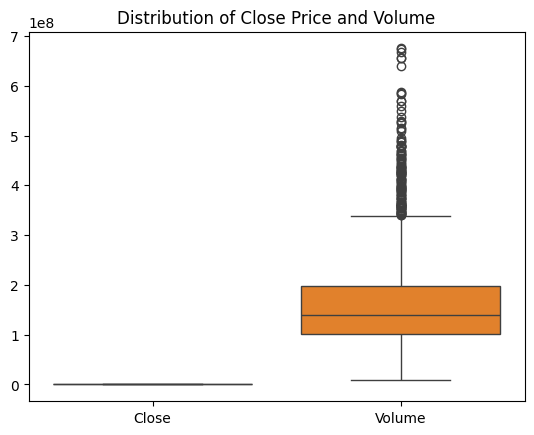

In [ ]:
# Plot distributions of numerical featuresv to check outliers
sns.boxplot(data=train[['Close', 'Volume']])
plt.title("Distribution of Close Price and Volume")
plt.show()

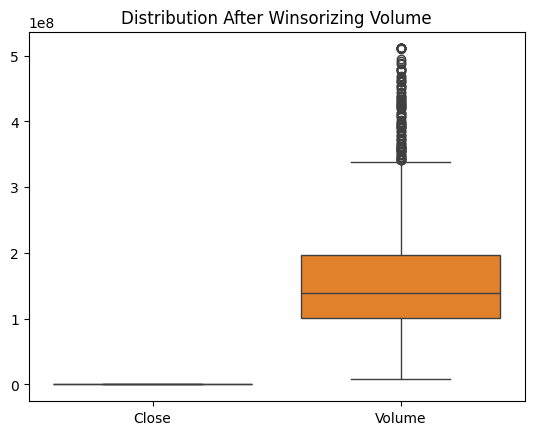

In [ ]:
# Winsorize Volume only
volume_99th = train['Volume'].quantile(0.99)
train['Volume'] = train['Volume'].clip(upper=volume_99th)

# Re-plot to verify
sns.boxplot(data=train[['Close', 'Volume']])
plt.title("Distribution After Winsorizing Volume")
plt.show()

Outliers observed in Close (valid market events, e.g., crashes) and Volume (extreme trading activity) were retained for price integrity but capped for volume at the 99th percentile.
Winsorized Volume to reduce noise while preserving Close outliers as critical financial data points.

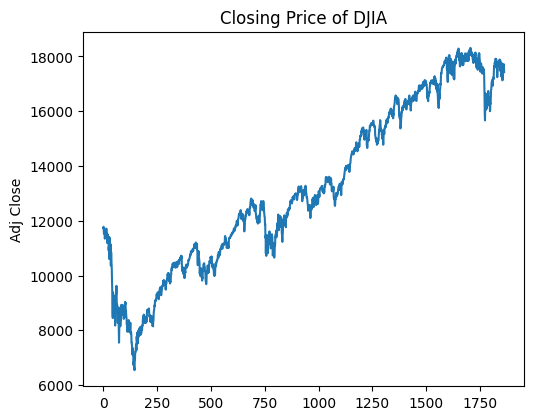

In [ ]:
# Let's see a historical view of the closing price
tech_list = ['DJIA']
company_list = ['Dow Jones International Average']
plt.figure(figsize=(10, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    train['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

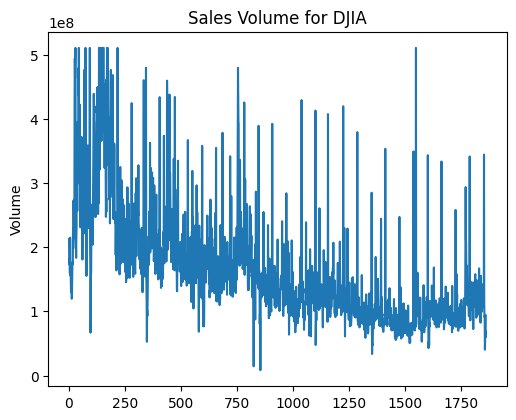

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(10, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    train['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# Stock Sentiment Analysis using News Headlines

In [ ]:
# Clean the headlines
# Removing punctuation and converting to lowercase
train_data = train.iloc[:, 2:27]
train_data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
train_data.columns = [str(i) for i in range(25)]  # Renaming columns for ease of access

# Convert headlines to lowercase
for index in range(25):
    train_data[str(index)] = train_data[str(index)].str.lower()

# Combine all headlines into a single string for each date
train_headlines = []
for row in range(len(train_data)):
    train_headlines.append(' '.join(str(x) for x in train_data.iloc[row, 0:25]))


train["headlines"] = train_headlines

In [ ]:
train_headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [ ]:
import spacy
from textblob import TextBlob
import re

# Load spaCy's English tokenizer and lemmatizer
nlp = spacy.load("en_core_web_sm")

# Preprocess function that handles text cleaning, stopword removal, and lemmatization
def preprocess_text(text):
    # Remove punctuation and make all text lowercase
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()

    # Process text using spaCy for tokenization and lemmatization
    doc = nlp(text)

    # Remove stopwords and lemmatize words
    text = ' '.join([token.lemma_ for token in doc if not token.is_stop])

    return text

# Apply preprocessing to train and test datasets
train_headlines = [preprocess_text(headline) for headline in train['headlines']]

# Combine cleaned headlines back into the datasets
train["cleaned_headlines"] = train_headlines

# Simple sentiment analysis function using TextBlob
def get_sentiment(text):
    # Perform sentiment analysis using TextBlob
    analysis = TextBlob(text)
    # Sentiment polarity: positive (1) if polarity > 0, else negative (0)
    return 1 if analysis.sentiment.polarity > 0 else 0

# Apply sentiment analysis to both train and test datasets
train['sentiment'] = train['cleaned_headlines'].apply(get_sentiment)


# To get a count of 0 and 1 in the sentiment column
train_sentiment_dist = train['sentiment'].value_counts()

print("Train Sentiment Distribution:\n", train_sentiment_dist)


Train Sentiment Distribution:
 sentiment
1    1121
0     742
Name: count, dtype: int64


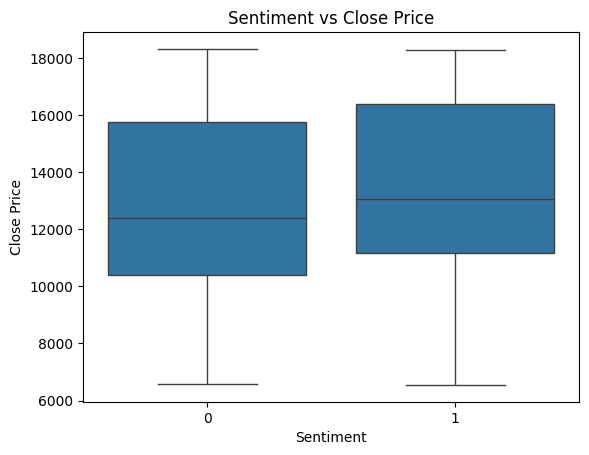

In [ ]:
# 1. Sentiment Distribution for 'Close' Price
sns.boxplot(x='sentiment', y='Close', data=train)
plt.title('Sentiment vs Close Price')
plt.xlabel('Sentiment')
plt.ylabel('Close Price')
plt.show()

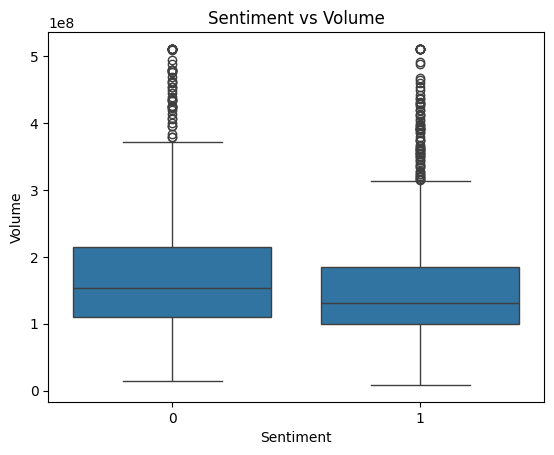

In [ ]:
# 2. Sentiment Distribution for 'Volume'
sns.boxplot(x='sentiment', y='Volume', data=train)
plt.title('Sentiment vs Volume')
plt.xlabel('Sentiment')
plt.ylabel('Volume')
plt.show()

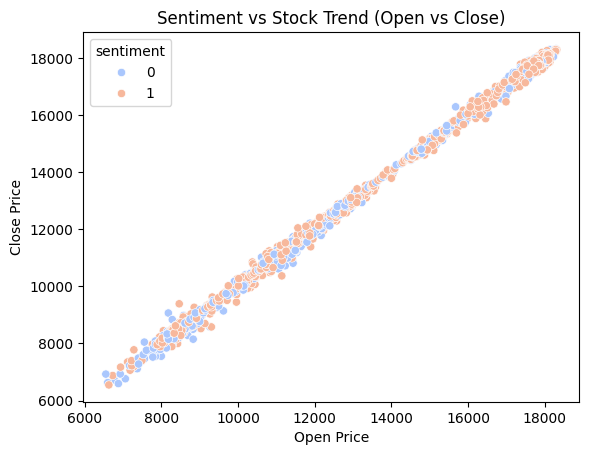

In [ ]:
# 3. Sentiment vs Stock Trend (using 'Open' and 'Close')
sns.scatterplot(x='Open', y='Close', hue='sentiment', data=train, palette='coolwarm')
plt.title('Sentiment vs Stock Trend (Open vs Close)')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

<ipython-input-27-22612dc62c71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train, palette='coolwarm')


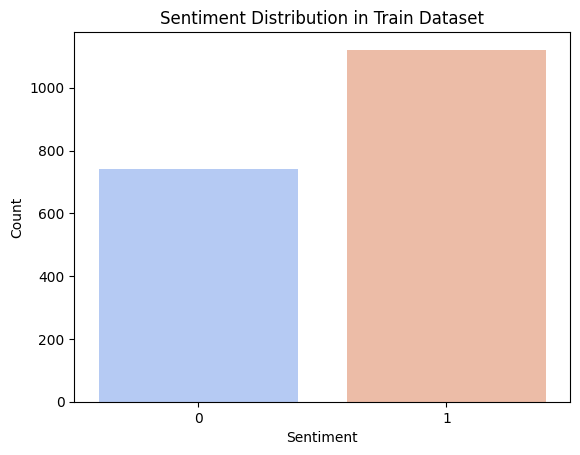

In [ ]:
# 4. Sentiment Distribution in Train Dataset
sns.countplot(x='sentiment', data=train, palette='coolwarm')
plt.title('Sentiment Distribution in Train Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

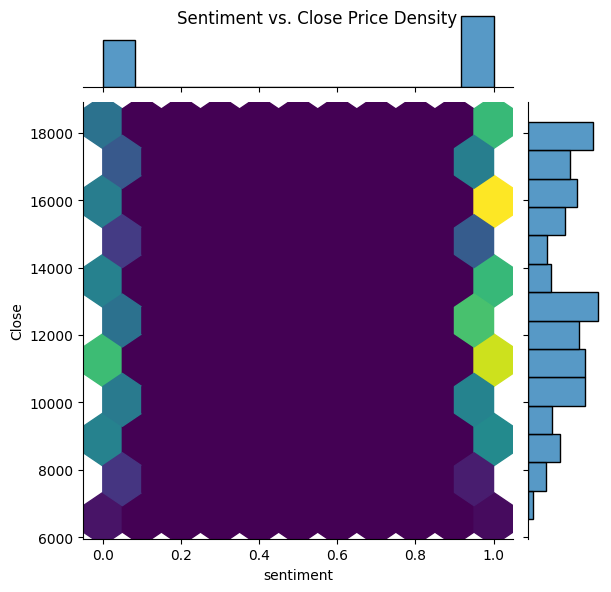

In [ ]:
# 5. Hexbin plot for Sentiment vs. Close Price
sns.jointplot(
    data=train,
    x='sentiment',
    y='Close',
    kind='hex',
    cmap='viridis'
)
plt.suptitle("Sentiment vs. Close Price Density")
plt.show()

# Feature Engineering

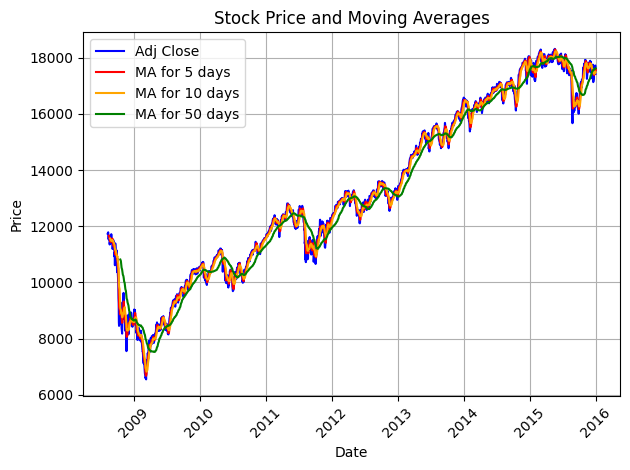

In [ ]:
# Simple Moving Averages of dija (DOW JONES INTERNATIONAL Averages)taken over a specific period of time
# Calculate the SMAs for 5, 10, and 50 days
train['SMA_5'] = train['Close'].rolling(window=5).mean()
train['SMA_10'] = train['Close'].rolling(window=10).mean()
train['SMA_50'] = train['Close'].rolling(window=50).mean()
# Plot the Adjusted Close Price and SMAs
plt.plot(train['Date'], train['Close'], label='Adj Close', color='blue')
plt.plot(train['Date'], train['SMA_5'], label='MA for 5 days', color='red')
plt.plot(train['Date'], train['SMA_10'], label='MA for 10 days', color='orange')
plt.plot(train['Date'], train['SMA_50'], label='MA for 50 days', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and Moving Averages')
plt.legend(loc='best')

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45)

# Display the grid and the plot
plt.grid(True)
plt.tight_layout()
plt.show()

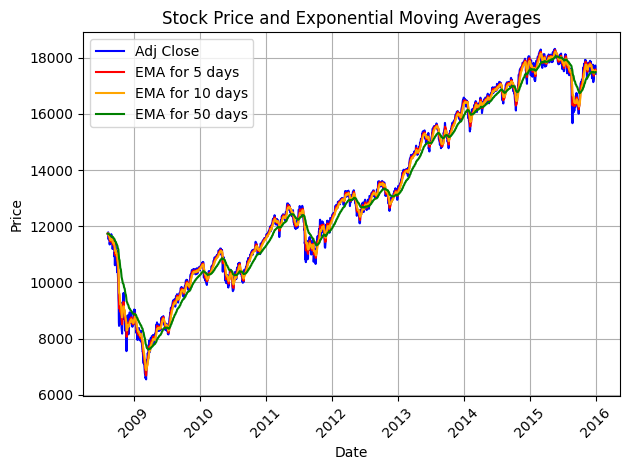

In [ ]:
# Calculate the Exponential Moving Averages (EMA) for 5, 10, and 50 days
train['EMA_5'] = train['Close'].ewm(span=5, adjust=False).mean()
train['EMA_10'] = train['Close'].ewm(span=10, adjust=False).mean()
train['EMA_50'] = train['Close'].ewm(span=50, adjust=False).mean()

# Plot the Adjusted Close Price and EMAs
plt.plot(train['Date'], train['Close'], label='Adj Close', color='blue')
plt.plot(train['Date'], train['EMA_5'], label='EMA for 5 days', color='red')
plt.plot(train['Date'], train['EMA_10'], label='EMA for 10 days', color='orange')
plt.plot(train['Date'], train['EMA_50'], label='EMA for 50 days', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and Exponential Moving Averages')
plt.legend(loc='best')

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45)

# Display the grid and the plot
plt.grid(True)
plt.tight_layout()
plt.show()

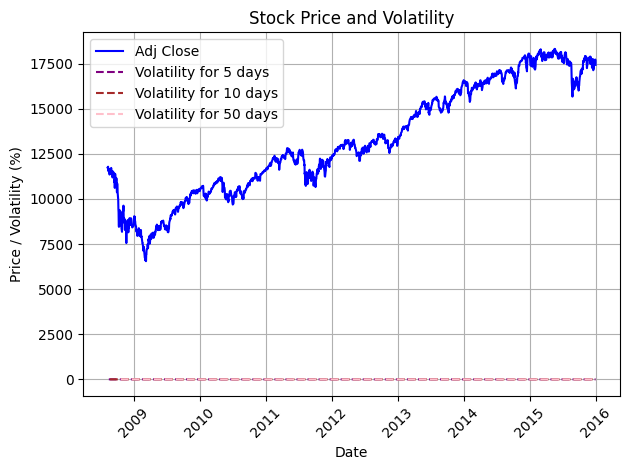

In [ ]:
# Calculate the daily returns
train['Daily_Return'] = train['Close'].pct_change()  # Percentage change in price

# Calculate rolling volatility (standard deviation of daily returns) for 5, 10, 50 days
train['Volatility_5'] = train['Daily_Return'].rolling(window=5).std()  # 5-day volatility
train['Volatility_10'] = train['Daily_Return'].rolling(window=10).std()  # 10-day volatility
train['Volatility_50'] = train['Daily_Return'].rolling(window=50).std()  # 50-day volatility

# Plot the Adjusted Close Price
plt.plot(train['Date'], train['Close'], label='Adj Close', color='blue')

# Plot the Volatility
plt.plot(train['Date'], train['Volatility_5'] * 100, label='Volatility for 5 days', color='purple', linestyle='--')
plt.plot(train['Date'], train['Volatility_10'] * 100, label='Volatility for 10 days', color='brown', linestyle='--')
plt.plot(train['Date'], train['Volatility_50'] * 100, label='Volatility for 50 days', color='pink', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price / Volatility (%)')
plt.title('Stock Price and Volatility')

# Add a legend to differentiate the lines
plt.legend(loc='best')

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45)

# Display the grid and the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
train

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,SMA_5,SMA_10,SMA_50,EMA_5,EMA_10,EMA_50,Daily_Return,Volatility_5,Volatility_10,Volatility_50
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,NaN,NaN,NaN,11734.320310,11734.320310,11734.320310,NaN,NaN,NaN,NaN
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,NaN,NaN,NaN,11750.330077,11743.052910,11736.203812,0.004093,NaN,NaN,NaN
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,NaN,NaN,NaN,11714.376628,11724.765059,11732.527966,-0.011872,NaN,NaN,NaN
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,NaN,NaN,NaN,11653.904405,11689.891405,11724.701769,-0.009406,NaN,NaN,NaN
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11661.605860,NaN,NaN,11641.246167,11676.443820,11720.436198,0.007194,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2015-12-24,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,...,17390.443750,17435.576953,17593.362227,17484.572528,17482.204978,17472.733182,-0.002865,0.013261,0.012911,0.009339
1859,2015-12-28,0,"Germany recruits 8,500 teachers to teach Germa...","Almost 23,000 people have signed an Italian po...",Japan apologizes to Korea over sexual enslavem...,Milan and Rome ban cars as pollution rises. Mi...,Saudi posts record $98 bn deficit in 2015,"The United States, Russia, Iran, and Saudi Ara...",Vladimir Putin has achieved his central goal o...,Noted Syrian journalist who uncovered ISIS Ale...,...,17470.387500,17461.882812,17601.092618,17499.138195,17490.580351,17474.911078,-0.001362,0.006314,0.011388,0.009180
1860,2015-12-29,1,Pentagon thwarts Obama's effort to close Guant...,Rare Footage of Giant Squid in Japan,Muslims tell ISIS they'd rather see Star Wars ...,Syrian Journalist Who Documented ISIS Atrociti...,North Korea's second most-pow

In [ ]:
train.fillna(method='bfill', inplace=True)

<ipython-input-33-3f8e6918f913>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='bfill', inplace=True)


In [ ]:
# # Save the updated train DataFrame to a CSV file
# train.to_csv('Cleaned_train_data_with_features.csv', index=False)

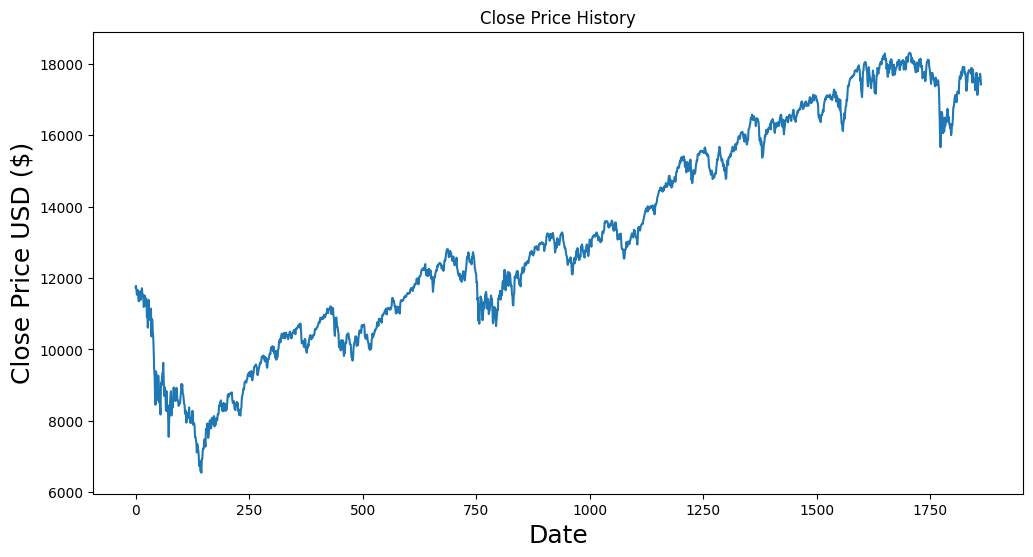

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(train['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Feature Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns that need to be normalized (excluding Date and Label)
features = ['Close', 'SMA_5', 'SMA_10', 'SMA_50', 'EMA_5', 'EMA_10', 'EMA_50', 'Volatility_5', 'Volatility_10', 'Volatility_50', 'Daily_Return']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
train[features] = scaler.fit_transform(train[features])
train.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,SMA_5,SMA_10,SMA_50,EMA_5,EMA_10,EMA_50,Daily_Return,Volatility_5,Volatility_10,Volatility_50
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.429334,0.415796,0.312815,0.435940,0.428463,0.395363,0.436992,0.105786,0.160421,0.70432
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.429334,0.415796,0.312815,0.437322,0.429233,0.395544,0.436992,0.105786,0.160421,0.70432
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.429334,0.415796,0.312815,0.434218,0.427620,0.395192,0.352760,0.105786,0.160421,0.70432
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.429334,0.415796,0.312815,0.428998,0.424545,0.394442,0.365771,0.105786,0.160421,0.70432
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.429334,0.415796,0.312815,0.427905,0.423359,0.394033,0.453354,0.105786,0.160421,0.70432


In [ ]:
from sklearn.model_selection import train_test_split

# Set up the features (X) and target (y)
features = ['Close', 'SMA_5', 'SMA_10', 'SMA_50', 'EMA_5', 'EMA_10', 'EMA_50',
            'Volatility_5', 'Volatility_10', 'Volatility_50', 'Daily_Return', 'sentiment']
target = 'Close'  # We want to predict the 'Close' price

X = train[features].values
y = train[target].values

# Reshape the data for time-series (LSTM/GRU requires 3D input: [samples, time steps, features])
lookback = 60
X_seq, y_seq = [], []
for i in range(lookback, len(X)):
    X_seq.append(X[i-lookback:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# GRU Model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model


In [ ]:
# Train LSTM model
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0878 - val_loss: 0.0074
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027 - val_loss: 9.2782e-04
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - val_loss: 9.7782e-04


In [ ]:
# Train GRU model
gru_model = create_gru_model((X_train.shape[1], X_train.shape[2]))
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0789 - val_loss: 0.0026
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083 - val_loss: 7.1341e-04
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - val_loss: 7.2544e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0050 - val_loss: 6.2834e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - val_loss: 6.6048e-04
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031 - val_loss: 8.3373e-04
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 5.7057e-04


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on test data for LSTM
lstm_predictions = lstm_model.predict(X_test)

# Predict on test data for GRU
gru_predictions = gru_model.predict(X_test)

# Calculate MSE and MAE for LSTM
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)

# Calculate MSE and MAE for GRU
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_mae = mean_absolute_error(y_test, gru_predictions)

# Print evaluation results
print(f"LSTM MSE: {lstm_mse}, LSTM MAE: {lstm_mae}")
print(f"GRU MSE: {gru_mse}, GRU MAE: {gru_mae}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
LSTM MSE: 0.0009778198269151236, LSTM MAE: 0.023920170075464906
GRU MSE: 0.0005705688951881936, GRU MAE: 0.018442863229174458


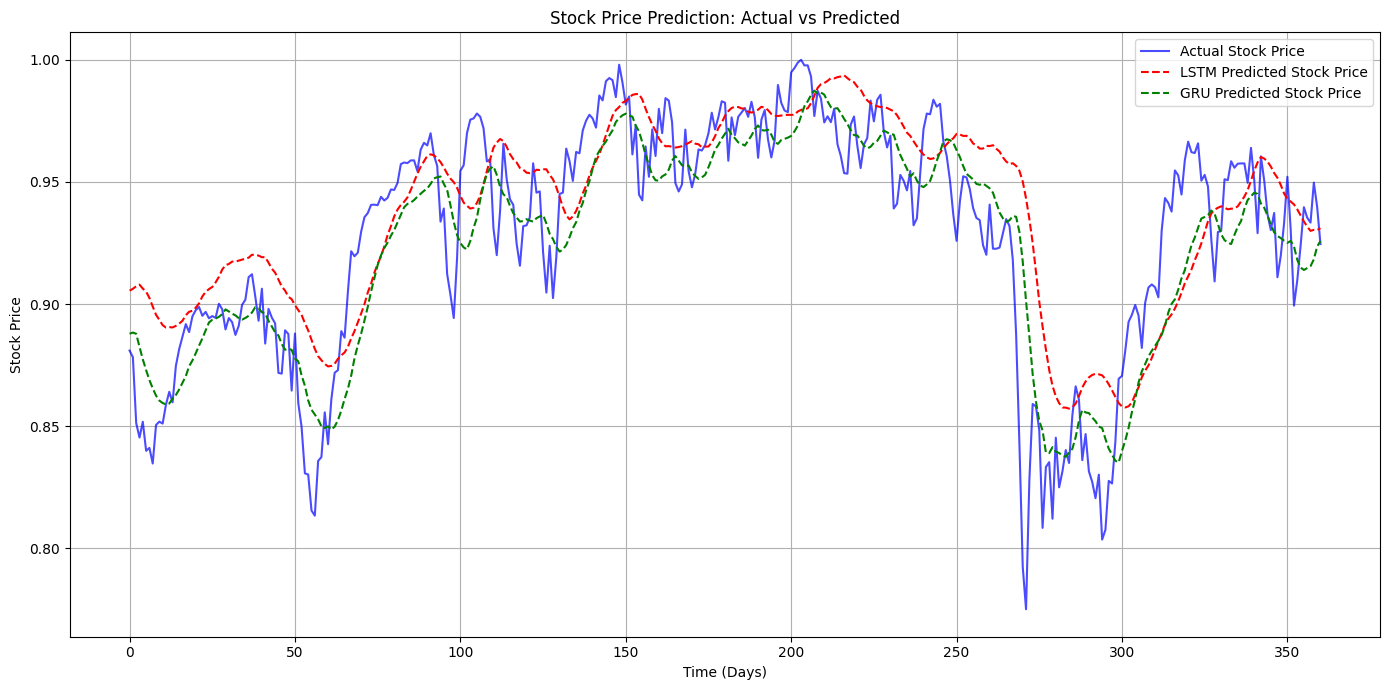

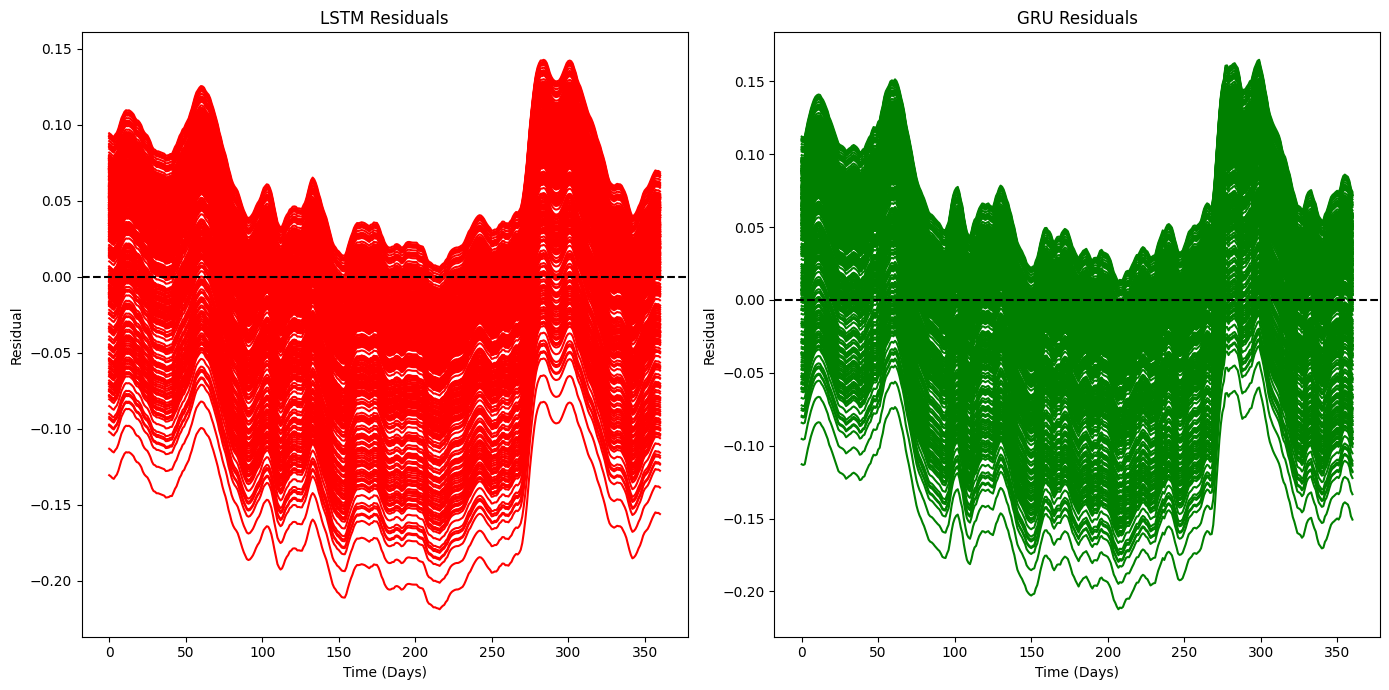

In [ ]:
# Plot actual vs predicted stock prices for LSTM and GRU
plt.figure(figsize=(14, 7))

# Plot Actual Prices
plt.plot(y_test, label='Actual Stock Price', color='blue', alpha=0.7)

# Plot LSTM Predictions
plt.plot(lstm_predictions, label='LSTM Predicted Stock Price', color='red', linestyle='--')

# Plot GRU Predictions
plt.plot(gru_predictions, label='GRU Predicted Stock Price', color='green', linestyle='--')

# Add labels and title
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction: Actual vs Predicted')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Residuals for LSTM and GRU
plt.figure(figsize=(14, 7))

# LSTM Residuals
plt.subplot(1, 2, 1)
plt.plot(y_test - lstm_predictions, label='LSTM Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('LSTM Residuals')
plt.xlabel('Time (Days)')
plt.ylabel('Residual')

# GRU Residuals
plt.subplot(1, 2, 2)
plt.plot(y_test - gru_predictions, label='GRU Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('GRU Residuals')
plt.xlabel('Time (Days)')
plt.ylabel('Residual')

# Show plot
plt.tight_layout()
plt.show()


Both models seem to follow the general trend of the actual stock prices, but there are noticeable differences.

* The LSTM model (red) appears to capture the fluctuations and trends of the actual price more accurately, especially during the peaks and valleys.
* The GRU model (green) also follows the trend but shows larger deviations from the actual values, especially during certain periods.


# Hyperparameter Tuning

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
# Install Keras Tuner
!pip install keras-tuner


In [ ]:
# Reshape target variable to (samples, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Check the new shapes
print(y_train.shape)  # Should be (1442, 1)
print(y_test.shape)   # Should be (361, 1)

(1442, 1)
(361, 1)


In [ ]:
import shutil

# Clear the directory where the models and checkpoints are stored
shutil.rmtree('my_dir')


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define model-building function for LSTM
def build_lstm_model(hp):
    model = Sequential()

    # Tune number of LSTM units
    units = hp.Int('units', min_value=50, max_value=150, step=50)
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define model-building function for GRU
def build_gru_model(hp):
    model = Sequential()

    # Tune number of GRU units
    units = hp.Int('units', min_value=50, max_value=150, step=50)
    model.add(GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units=units, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Reinitialize and perform hyperparameter search again
tuner_lstm = kt.Hyperband(
    build_lstm_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='stock_prediction_lstm'
)

tuner_gru = kt.Hyperband(
    build_gru_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='stock_prediction_gru'
)

# Perform the search again
tuner_lstm.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
tuner_gru.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best models from LSTM and GRU
best_lstm_model = tuner_lstm.get_best_models(num_models=1)[0]
best_gru_model = tuner_gru.get_best_models(num_models=1)[0]

# Show the summary of the best models
print("Best LSTM Model Summary:")
best_lstm_model.summary()

print("\nBest GRU Model Summary:")
best_gru_model.summary()


Trial 30 Complete [00h 00m 12s]
val_loss: 0.007738339249044657

Best val_loss So Far: 0.00046457574353553355
Total elapsed time: 00h 03m 58s
Best LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          45,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,701 (491.02 KB)

 Trainable params: 125,701 (491.02 KB)

 Non-trainable params: 0 (0.00 B)


Best GRU Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 150)             │          73,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 150)                 │         135,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,851 (819.73 KB)

 Trainable params: 209,851 (819.73 KB)

 Non-trainable params: 0 (0.00 B)

LSTM Model:

* Better performance: The LSTM model has a lower validation loss (0.0004464334) compared to the GRU model (0.0004894436). This indicates that the LSTM model has better predictive accuracy.
* More parameters: LSTM has more trainable parameters (278,551) than GRU (209,851), which suggests it has more capacity to learn complex patterns, but it might also be more prone to overfitting if not carefully tuned.

GRU Model:

* Larger validation loss: The GRU model has a slightly higher validation loss, indicating it might not capture the data as effectively as the LSTM model in this case.
* Fewer parameters: The GRU model has fewer parameters (209,851), making it computationally lighter than the LSTM model. This could be an advantage if computational resources are limited.


In [ ]:
# Evaluate the Best LSTM Model on the Test Set

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the best LSTM model
lstm_predictions = best_lstm_model.predict(X_test)

# Calculate MSE and MAE for LSTM on the test set
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)

# Print the evaluation results
print(f"Test Set LSTM MSE: {lstm_mse}")
print(f"Test Set LSTM MAE: {lstm_mae}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Set LSTM MSE: 0.0006843683736063148
Test Set LSTM MAE: 0.020025638073389588


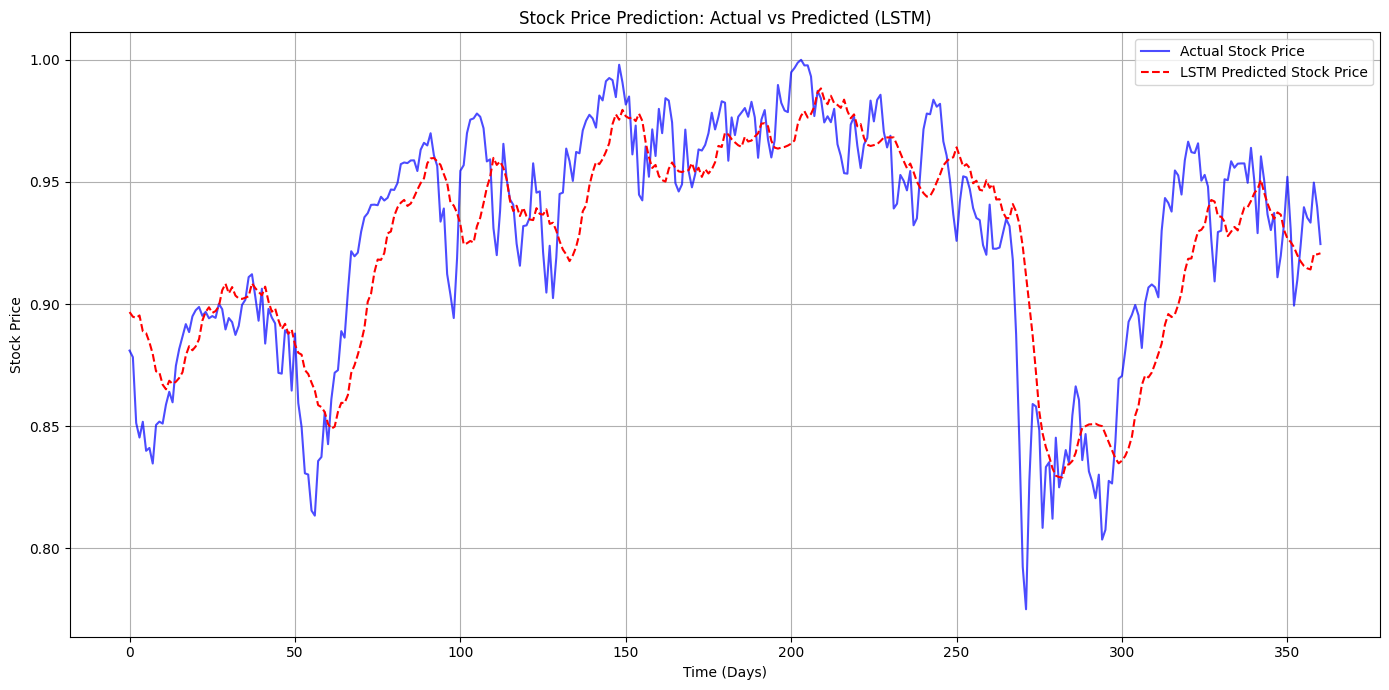

In [ ]:
#Visualize Predictions and Actual Stock Prices
# Plot actual vs predicted stock prices for LSTM
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Stock Price', color='blue', alpha=0.7)
plt.plot(lstm_predictions, label='LSTM Predicted Stock Price', color='red', linestyle='--')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction: Actual vs Predicted (LSTM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


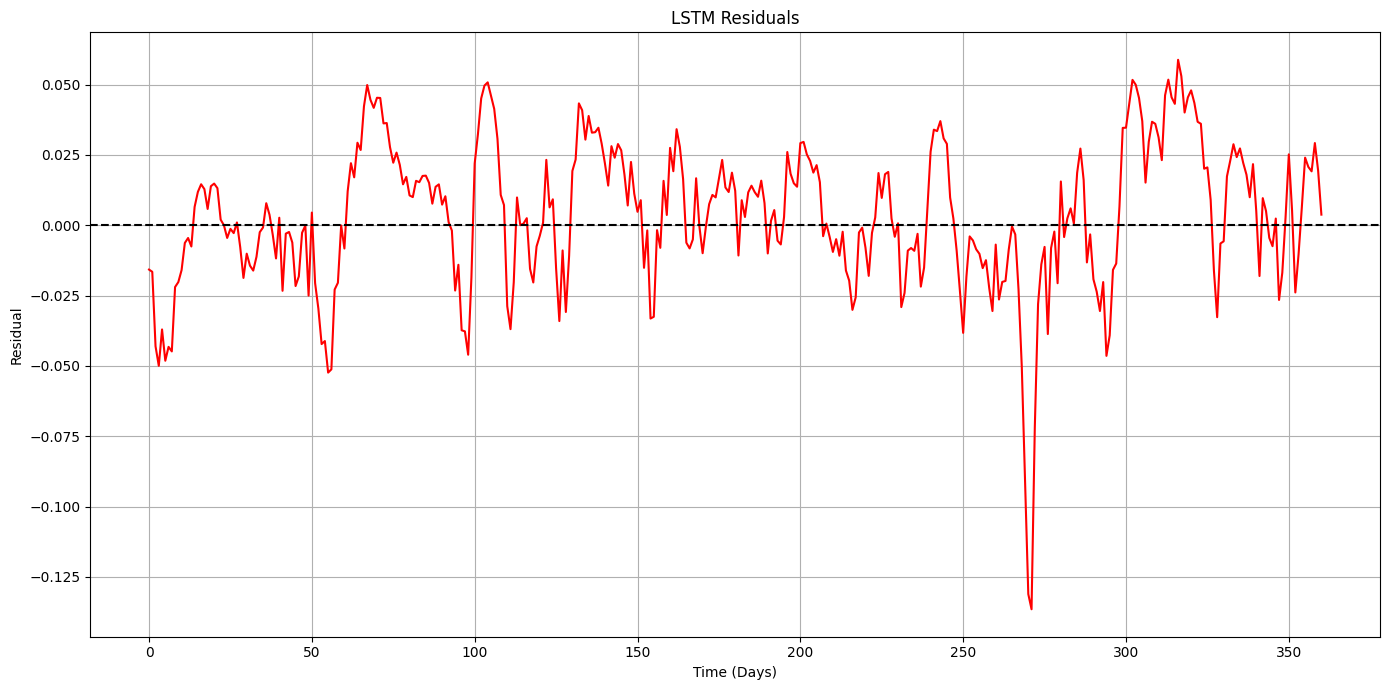

In [ ]:
# Plot residuals (errors between actual and predicted)
plt.figure(figsize=(14, 7))
residuals = y_test - lstm_predictions
plt.plot(residuals, label='LSTM Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('LSTM Residuals')
plt.xlabel('Time (Days)')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # 5 folds

# Lists to store the evaluation metrics for each fold
cv_mse = []
cv_mae = []

# Loop over the splits
for train_index, test_index in tscv.split(X_train):
    # Split the data into training and test sets for this fold
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    # Train the LSTM model on this fold
    lstm_model = best_lstm_model  # Use the best LSTM model obtained from tuning
    lstm_model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)  # Train for 10 epochs

    # Predict on the test set for this fold
    lstm_predictions = lstm_model.predict(X_test_cv)

    # Calculate MSE and MAE for this fold
    mse = mean_squared_error(y_test_cv, lstm_predictions)
    mae = mean_absolute_error(y_test_cv, lstm_predictions)

    # Append the results to the lists
    cv_mse.append(mse)
    cv_mae.append(mae)

# Print the average MSE and MAE for the cross-validation
print(f"Average MSE across all folds: {np.mean(cv_mse)}")
print(f"Average MAE across all folds: {np.mean(cv_mae)}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Average MSE across all folds: 0.00043901148424683957
Average MAE across all folds: 0.016987837486785236


In [4]:
# Save the best LSTM model
best_lstm_model.save('best_lstm_model.h5')


NameError: name 'best_lstm_model' is not defined

In [15]:
import gc
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model


best_lstm_model = load_model('/content/drive/MyDrive/best_lstm_model.h5')

# Load the cleaned data
train = pd.read_csv('/content/drive/MyDrive/Cleaned_train_data_with_features.csv', parse_dates=['Date'])

# Select the columns that need to be normalized (excluding Date and Label)
features = ['Close', 'SMA_5', 'SMA_10', 'SMA_50', 'EMA_5', 'EMA_10', 'EMA_50',
            'Volatility_5', 'Volatility_10', 'Volatility_50', 'Daily_Return', 'sentiment']
target = 'Close'

# Extract features and target
X = train[features].values
y = train[target].values

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Reshape the data to be 3D (samples, time steps, features) for LSTM input
def reshape_data(X_data, time_steps=60):
    X_reshaped = []
    for i in range(time_steps, len(X_data)):
        X_reshaped.append(X_data[i-time_steps:i])
    return np.array(X_reshaped)

X_train_reshaped = reshape_data(X_train)
X_test_reshaped = reshape_data(X_test)

# Now define your last 60 days input for prediction
last_60_days = X_test_reshaped[-1].reshape((1, X_test_reshaped.shape[1], X_test_reshaped.shape[2]))

# Number of features in your data
num_features = X_train_reshaped.shape[2]

# Define the MinMax scaler values for inverse scaling later
min_close = scaler.data_min_[0]
max_close = scaler.data_max_[0]

# Keep your prediction function as is
def predict_in_chunks(model, last_60_days, scaler, num_features, min_close, max_close, total_days=20, chunk_size=20):
    predictions = []
    current_input = last_60_days
    predicted_count = 0  # Counter for the number of predictions

    while predicted_count < total_days:
        remaining_days = total_days - predicted_count
        current_chunk_size = min(chunk_size, remaining_days)

        print(f"Predicting days {predicted_count + 1} to {predicted_count + current_chunk_size}")

        chunk_predictions = []
        for _ in range(current_chunk_size):
            pred = model.predict(current_input)
            scaled_pred = pred[0, 0]  # Predicted Close (scaled)

            # Inverse scaling for the prediction result
            actual_predicted_close = scaled_pred * (max_close - min_close) + min_close
            chunk_predictions.append(actual_predicted_close)

            # Update features using the scaled prediction for model input
            new_features = update_features(current_input, scaled_pred)

            # Reshape and update input
            pred_reshaped = new_features.reshape(1, 1, num_features)
            current_input = np.append(current_input[:, 1:, :], pred_reshaped, axis=1)

        predictions.extend(chunk_predictions)
        predicted_count += current_chunk_size

        # Save progress
        chunk_dates = pd.date_range(start='2016-01-01', periods=len(chunk_predictions), freq='D')
        chunk_df = pd.DataFrame(data=chunk_predictions, index=chunk_dates, columns=['Predicted_Close'])
        chunk_df.to_csv(f'predicted_chunk_{predicted_count - current_chunk_size + 1}_to_{predicted_count}.csv', index=True)

        gc.collect()

    return predictions

def update_features(current_input, scaled_pred_close):
    new_features = current_input[0, -1, :].copy()
    new_features[0] = scaled_pred_close  # Keep Close scaled for next input
    return new_features

# Generate predictions for the next 20 days
predicted_prices = predict_in_chunks(best_lstm_model, last_60_days, scaler, num_features, min_close, max_close, total_days=20, chunk_size=20)

# Create DataFrame with correct inverse-scaled values
future_dates = pd.date_range(start='2016-01-01', periods=20, freq='D')  # Adjust for 20 days
predictions_df = pd.DataFrame(data=predicted_prices, index=future_dates, columns=['Predicted_Close'])

# Print the final predictions
print(predictions_df)


Predicting days 1 to 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
            Predicted_Close
2016-01-01     17157.040901
2016-01-02     17113.943716
2016-01-03     17066.355604
2016-01-04     17024.808223
2016-01-05     16993.290391
2016-01-06     16971.890468
2016-01-07     1695

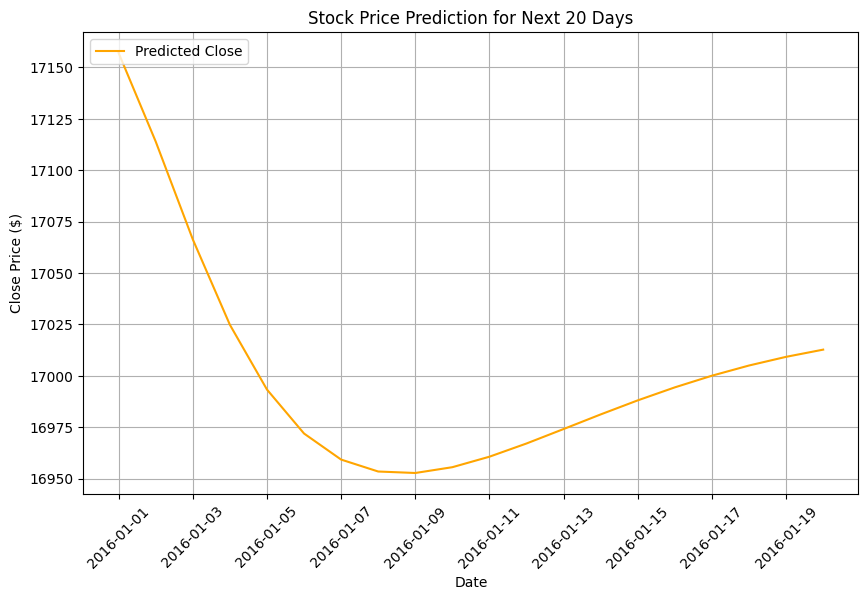

In [16]:
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.index, predictions_df['Predicted_Close'], color='orange', label='Predicted Close')
plt.title('Stock Price Prediction for Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [17]:
# Assuming predictions_df contains your predicted values

# Print the complete predicted close values
print(predictions_df)

# If you want to save it to a text file for easier viewing:
predictions_df.to_csv('predicted_close_values.csv', index=True)


            Predicted_Close
2016-01-01     17157.040901
2016-01-02     17113.943716
2016-01-03     17066.355604
2016-01-04     17024.808223
2016-01-05     16993.290391
2016-01-06     16971.890468
2016-01-07     16959.208720
2016-01-08     16953.404316
2016-01-09     16952.686918
2016-01-10     16955.506020
2016-01-11     16960.613361
2016-01-12     16967.043296
2016-01-13     16974.075622
2016-01-14     16981.187891
2016-01-15     16988.023861
2016-01-16     16994.350710
2016-01-17     17000.026079
2016-01-18     17004.981947
2016-01-19     17009.202184
2016-01-20     17012.705022


In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [10]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Load the model and initialize buffer
model = load_model('/content/drive/MyDrive/best_lstm_model.h5')
train = pd.read_csv('/content/drive/MyDrive/Cleaned_train_data_with_features.csv', parse_dates=['Date'])
feature_columns = ['Close', 'SMA_5', 'SMA_10', 'SMA_50', 'EMA_5', 'EMA_10', 'EMA_50',
                   'Volatility_5', 'Volatility_10', 'Volatility_50', 'Daily_Return', 'sentiment']

# Initialize buffer with last 60 days
buffer = train[feature_columns].iloc[-60:].copy()
scaler = MinMaxScaler().fit(train[feature_columns])
buffer_scaled = scaler.transform(buffer)

def update_features(new_close, sentiment_value, current_buffer):
    # Create new row with features
    new_row = current_buffer.iloc[-1].copy()
    new_row['Close'] = new_close
    new_row['sentiment'] = sentiment_value

    # Update technical indicators
    window = current_buffer.Close.values
    new_window = np.append(window[-4:], new_close)  # For SMA_5

    new_row['SMA_5'] = np.mean(new_window)
    new_row['SMA_10'] = np.mean(np.append(current_buffer.Close[-9:].values, new_close))
    new_row['SMA_50'] = np.mean(np.append(current_buffer.Close[-49:].values, new_close))

    # For EMA calculations
    new_row['EMA_5'] = (new_close * (2/(5+1)) +
                       current_buffer.EMA_5.iloc[-1] * (1 - (2/(5+1))))
    new_row['EMA_10'] = (new_close * (2/(10+1)) +
                        current_buffer.EMA_10.iloc[-1] * (1 - (2/(10+1))))
    new_row['EMA_50'] = (new_close * (2/(50+1)) +
                        current_buffer.EMA_50.iloc[-1] * (1 - (2/(50+1))))

    # Update volatility
    new_row['Volatility_5'] = np.std(new_window)
    new_row['Volatility_10'] = np.std(np.append(current_buffer.Close[-9:].values, new_close))
    new_row['Volatility_50'] = np.std(np.append(current_buffer.Close[-49:].values, new_close))

    new_row['Daily_Return'] = (new_close - current_buffer.Close.iloc[-1]) / current_buffer.Close.iloc[-1]
    return pd.concat([current_buffer, pd.DataFrame([new_row])]).iloc[-60:]

def predict_next_20_days(close_price, sentiment):
    global buffer_scaled, buffer

    # Prepare input sequence
    input_seq = buffer_scaled[-60:].reshape(1, 60, -1)

    predictions = []
    temp_buffer = buffer.copy()

    for _ in range(20):
        # Predict next price
        pred = model.predict(input_seq, verbose=0)[0][0]

        # Inverse scale prediction
        dummy = np.zeros((1, len(feature_columns)))
        dummy[0,0] = pred
        actual_close = scaler.inverse_transform(dummy)[0][0]

        # Update buffer with predicted values
        temp_buffer = update_features(actual_close,
                                    1 if sentiment == "Positive" else 0,
                                    temp_buffer)

        # Scale new buffer and update input sequence
        new_scaled = scaler.transform(temp_buffer)
        input_seq = new_scaled[-60:].reshape(1, 60, -1)
        predictions.append(actual_close)

    # Update global buffer
    buffer = temp_buffer
    return predictions

def create_plot(close_price, sentiment):
    predictions = predict_next_20_days(close_price, sentiment)

    plt.figure(figsize=(10,6))
    plt.plot(buffer.index[-60:], buffer.Close[-60:], label='Historical Prices')
    future_dates = pd.date_range(buffer.index[-1], periods=21, freq='D')[1:]
    plt.plot(future_dates, predictions, label='Predicted Prices')
    plt.title('DJIA 20-Day Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/tmp/prediction.png')
    plt.close()

    return '/tmp/prediction.png', buffer.tail(20)

# Gradio Interface
interface = gr.Interface(
    fn=create_plot,
    inputs=[
        gr.Number(label="Today's Closing Price"),
        gr.Radio(["Positive", "Negative"], label="Market Sentiment")
    ],
    outputs=[
        gr.Image(label="Prediction Chart"),
        gr.DataFrame(label="Feature Values")
    ],
    title="DJIA Stock Price Prediction",
    description="Predict stock prices for the next 20 days based on current price and market sentiment"
)

interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fcf234efc5862a1dd1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
